In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/[2021-1]DM/Project/Spotify data/data.csv')
df_artist = pd.read_csv('/content/drive/MyDrive/[2021-1]DM/Project/Spotify data/data_by_artist.csv')

In [5]:
df[df['name']=='ICY GRL']

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
76074,0.0306,['Saweetie'],0.927,109302,0.563,1,1sl1cpix9GnwNwaVt04BIu,0.0,7,0.0736,-5.827,1,ICY GRL,71,2018-03-16,0.175,103.312,0.842,2018


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [7]:
df.shape

(174389, 19)

In [8]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


# Data Analysis

Features:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- timesignature (The predicted timesignature, most typically 4)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

In [8]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [9]:
df_copy = pd.read_csv('/content/drive/MyDrive/[2021-1]DM/Project/Spotify data/data.csv')
columns = ['id', 'name', 'artists', 'release_date', 'year']
for col in columns:
  print(f'{col:<15}: {df_copy[col].nunique()} unique values')

id             : 172230 unique values
name           : 137013 unique values
artists        : 36195 unique values
release_date   : 11043 unique values
year           : 102 unique values


In [ ]:
df['year'].value_counts().sort_index()

1920     349
1921     156
1922     121
1923     185
1924     236
        ... 
2017    2156
2018    2714
2019    2329
2020    4294
2021    1840
Name: year, Length: 102, dtype: int64

In [10]:
df_2020 = df[df['year']==2020]
df_2020['artists'].value_counts().sort_values(ascending=False)

['Workout Music ']                                        178
['Armin van Buuren']                                       91
['Paul Carrack']                                           89
['Casual Breakdown']                                       52
['WoT Music Team', 'Ivan Kucherenko']                      50
                                                         ... 
['Kristian Nairn', 'Ferry Corsten']                         1
['Tom Brosseau']                                            1
['Jonas Gérard', 'Reckless 2X', 'Bitter Sweet Monday']      1
['Naomi Harris', 'Taylor Jackson']                          1
['Ruben de Ronde', 'Elevven', 'Lara']                       1
Name: artists, Length: 1950, dtype: int64

In [ ]:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [ ]:
df_sample = df.sample(1000)

In [ ]:
df_genre.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1


In [ ]:
### Define Global Variables ###
global object_cols
object_cols = ['artist_name', 'track_id', 'track_name', 'key_notes','pop_cat']

global numeric_cols
numeric_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
        'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity','pop_frac','pop_bin']

global categorical_cols
categorical_cols = ['key', 'mode', 'time_signature']

global numeric_non_cat
numeric_non_cat = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness',
       'loudness', 'speechiness', 'tempo','valence',
       'popularity','pop_frac','pop_bin']

global cols_to_stardardize
cols_to_standardize = ['duration_ms', 'loudness', 'tempo']

In [ ]:
def describe_cols(df, L=10):
    '''Limit ENTIRE column width (including header)'''
    # get the max col width
    O = pd.get_option("display.max_colwidth")
    # set max col width to be L
    pd.set_option("display.max_colwidth", L)
    print(df.rename(columns=lambda x: x[:L - 2] + '...' if len(x) > L else x).describe())
    pd.set_option("display.max_colwidth", O)

describe_cols(df, 9)

       acousti...  danceab...  duratio...  ...     tempo   valence      year
count  17438...    17438...    1.743...    ...  17438...  17438...  17438...
mean   0.499228    0.536758    2.328...    ...  117.0...  0.524533  1977....
std    0.379936    0.176025    1.483...    ...  30.25...  0.264477  26.90...
min    0.000000    0.000000    4.937...    ...  0.000000  0.000000  1920....
25%    0.087700    0.414000    1.661...    ...  93.93...  0.311000  1955....
50%    0.517000    0.548000    2.057...    ...  115.8...  0.536000  1977....
75%    0.895000    0.669000    2.657...    ...  135.0...  0.743000  1999....
max    0.996000    0.988000    5.338...    ...  243.5...  1.000000  2021....

[8 rows x 15 columns]


## Plots

### Audio Features Over Years

Text(0.5, 0, 'Year')

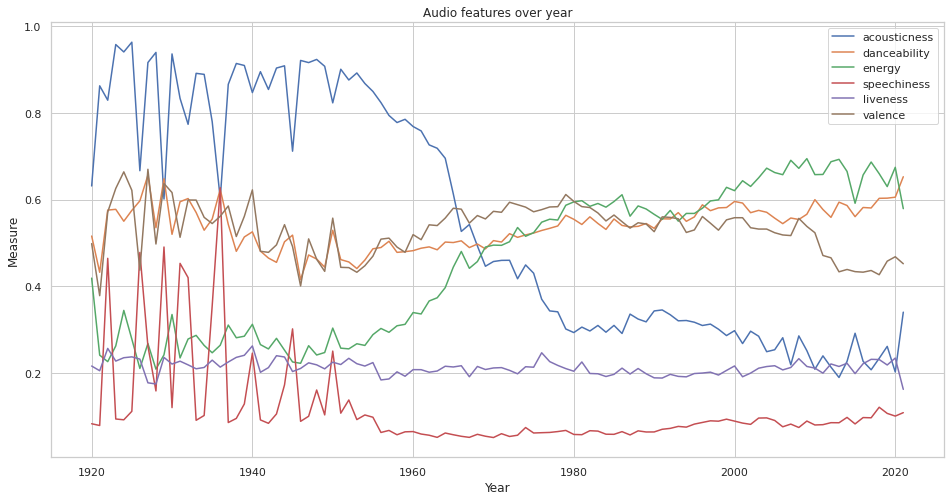

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","loudness","valence"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio features over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

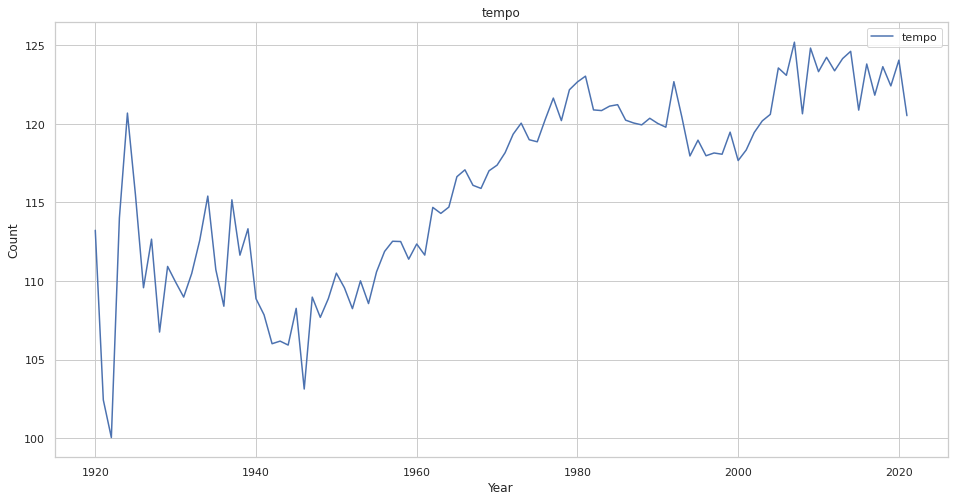

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["tempo"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('tempo')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

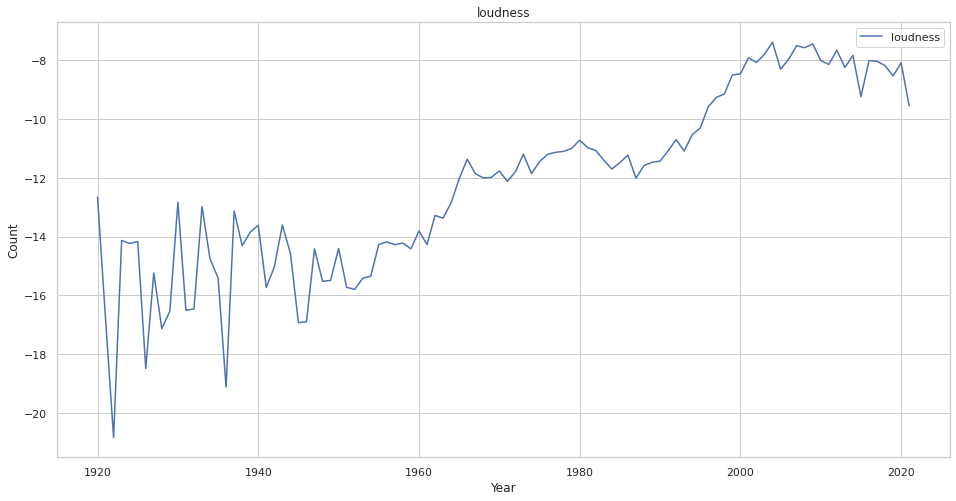

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["loudness"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('loudness')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

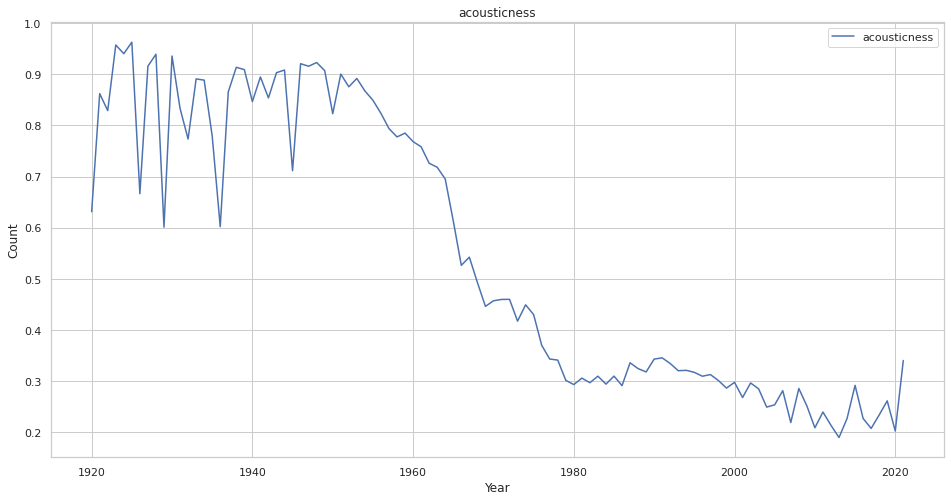

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('acousticness')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

### Popularity Distribution

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_pop_dist(df, feature):
    # set palette
    sns.set_palette('muted')

    # create initial figure
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    sns.distplot(df[feature]/100, color='g', label=feature).set_title(f"Distribution of {feature.upper()}")

    # create x and y axis labels
    plt.xlabel(feature)
    plt.ylabel("Density")

    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


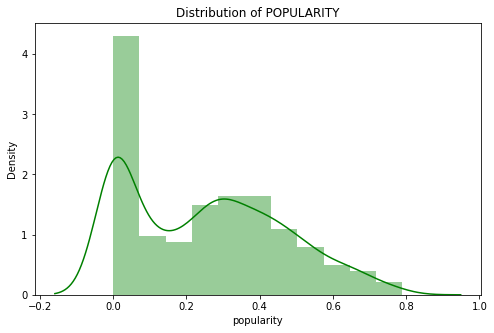

' or \nplt.figure(figsize=(16, 8))\nsns.distplot(df.popularity,bins=20)\n'

In [ ]:
# 샘플 데이터

plot_pop_dist(df_sample, 'popularity')

""" or 
plt.figure(figsize=(16, 8))
sns.distplot(df.popularity,bins=20)
"""

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


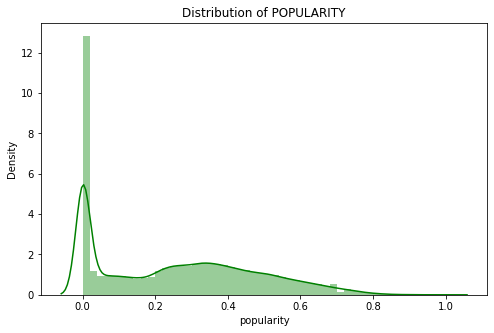

In [ ]:
# 전체 데이터 
plot_pop_dist(df, 'popularity')

### Duration Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


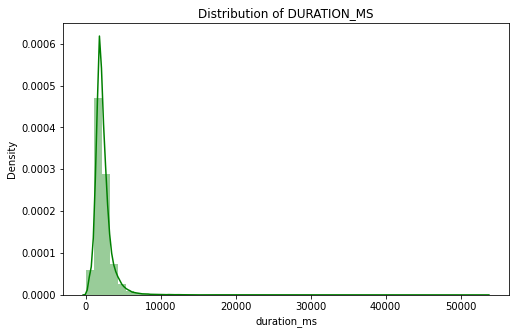

In [ ]:
plot_pop_dist(df, 'duration_ms')

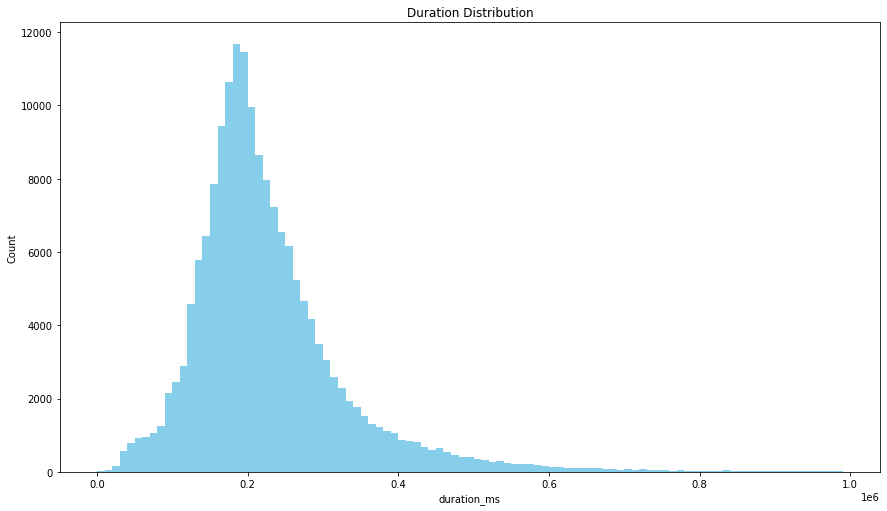

In [ ]:
bins = np.arange(0, 1000000, 10000)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df, x = 'duration_ms', bins = bins, color='skyblue')
plt.title('Duration Distribution')
plt.xlabel('duration_ms')
plt.ylabel('Count')
plt.show()

### Song Releases Over Years

In [ ]:
df['year'].value_counts().sort_index()

1920     349
1921     156
1922     121
1923     185
1924     236
        ... 
2017    2156
2018    2714
2019    2329
2020    4294
2021    1840
Name: year, Length: 102, dtype: int64

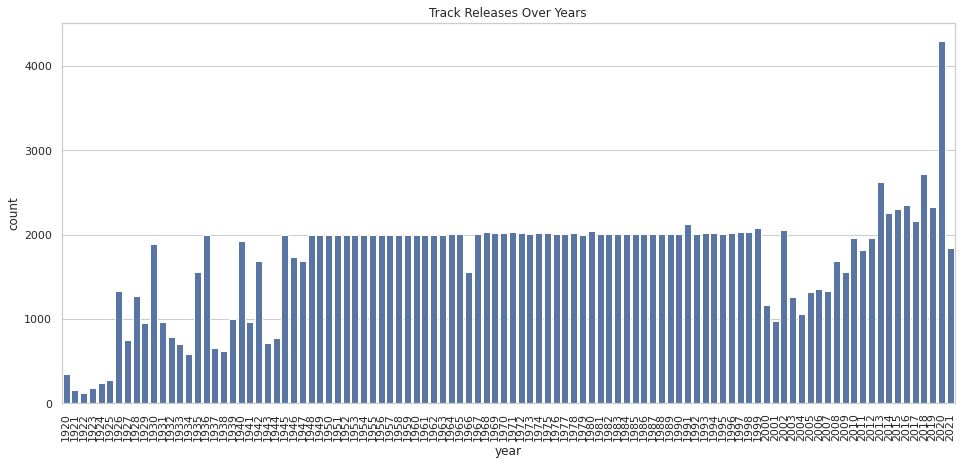

In [ ]:
# Return the Series having unique values
# df['year'] = df['release_date'].dt.year
base_color = sns.color_palette()[0]
plt.figure(figsize = [16, 7])
plt.xticks(rotation=90)
plt.title('Track Releases Over Years')
# Use the `color` argument
sns.countplot(data=df, x='year', color=base_color);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Year')

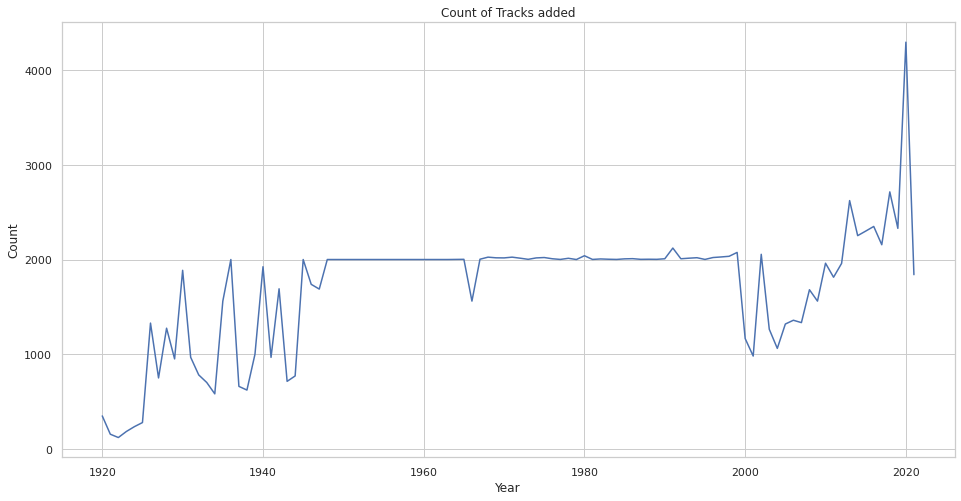

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("year")["id"].count()
ax= sns.lineplot(x.index,x)
ax.set_title('Count of Tracks added')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

### pairplot

In [ ]:
def plot_pairplot(df, start, end, cutoff):
    # not it looks MUCH better to run this function in jupyter
    df = df.copy()
    
    df['pop_bin'] = np.where(df['popularity'] > cutoff, "Popular", "Not_Popular")
    
    cols_for_pp = ['danceability', 'energy', 'instrumentalness',
       'loudness','valence', 'popularity', 'pop_bin']

    sns.pairplot(df.loc[start:end, cols_for_pp], hue='pop_bin', size=2)

    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


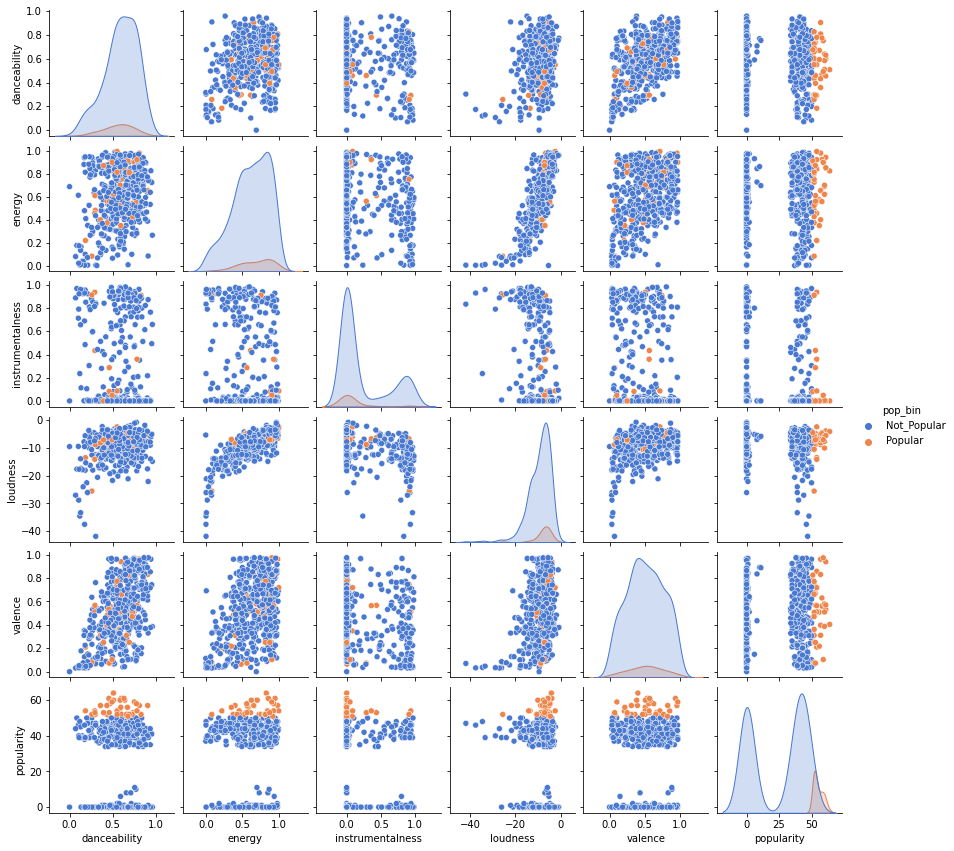

In [ ]:
plot_pairplot(df, 170000, 170500, 50)

### Features Affecting Popularity 

#### Energy - Popularity

Text(0.5, 0, 'energy (Ranges from 0 to 1)')

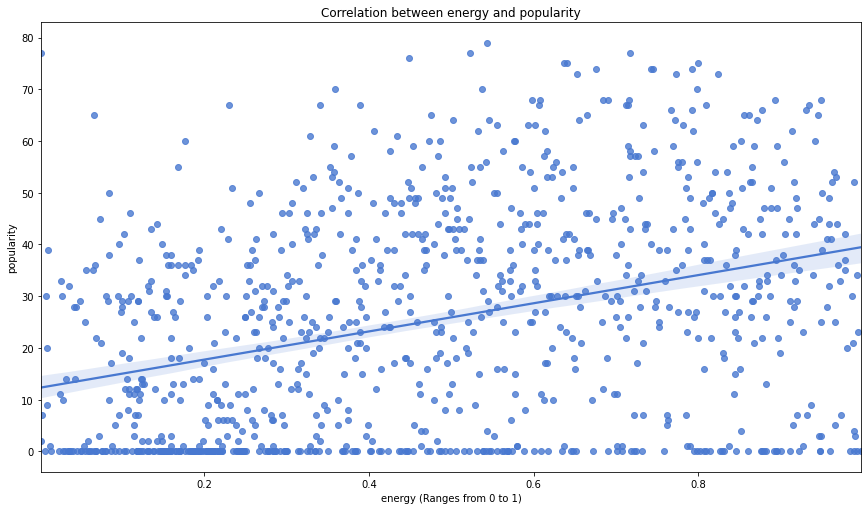

In [ ]:
plt.subplots(1,1,figsize=(14.70, 8.27))
ax1 = sns.regplot(data = df_sample, x = 'energy', y = 'popularity')
ax1.set_title('Correlation between energy and popularity')
ax1.set_xlabel('energy (Ranges from 0 to 1)')

#### Acousticness - Popularity

Text(0.5, 0, 'Acousticness (Ranges from 0 to 1)')

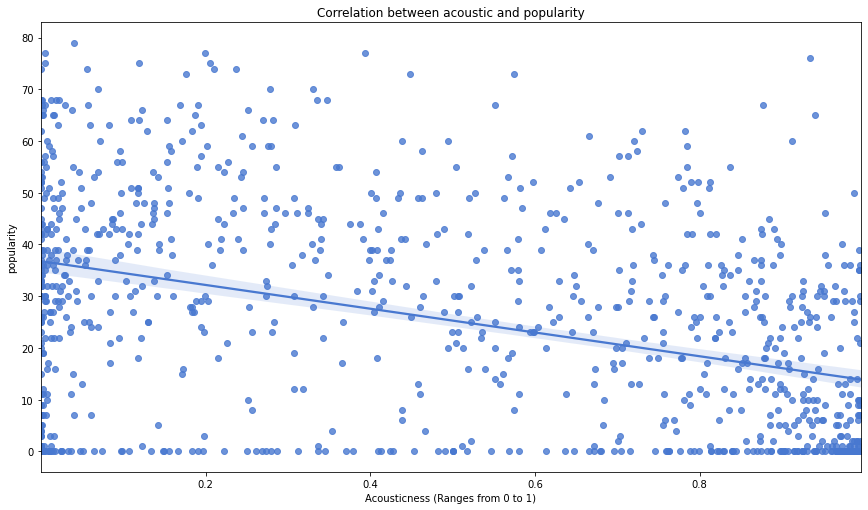

In [ ]:
plt.subplots(1,1,figsize=(14.70, 8.27))
ax1 = sns.regplot(data = df_sample, x = 'acousticness', y = 'popularity')
ax1.set_title('Correlation between acoustic and popularity')
ax1.set_xlabel('Acousticness (Ranges from 0 to 1)')

In [ ]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

#### Loudness - popularity

Text(0.5, 0, 'Loudness (Ranges from 0 to 1)')

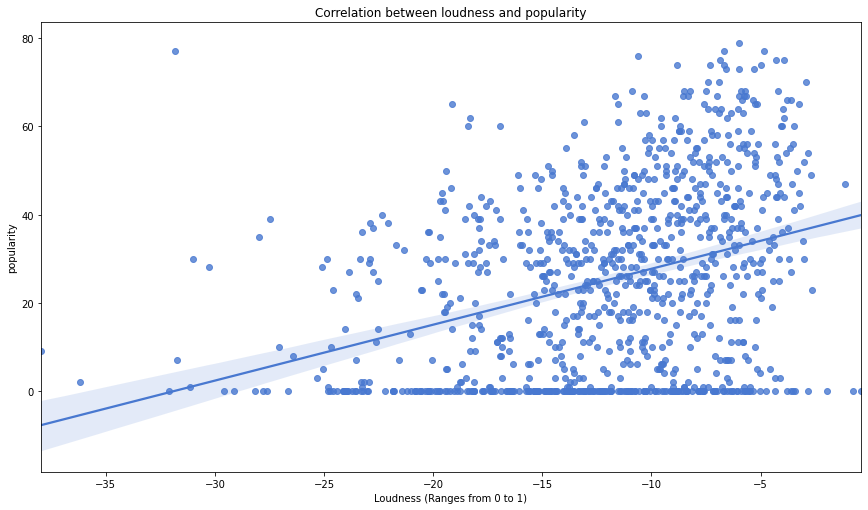

In [ ]:
plt.subplots(1,1,figsize=(14.70, 8.27))
ax1 = sns.regplot(data = df_sample, x = 'loudness', y = 'popularity')
ax1.set_title('Correlation between loudness and popularity')
ax1.set_xlabel('Loudness (Ranges from 0 to 1)')

#### Danceability - Popularity

Text(0.5, 0, 'Danceability (Ranges from 0 to 1)')

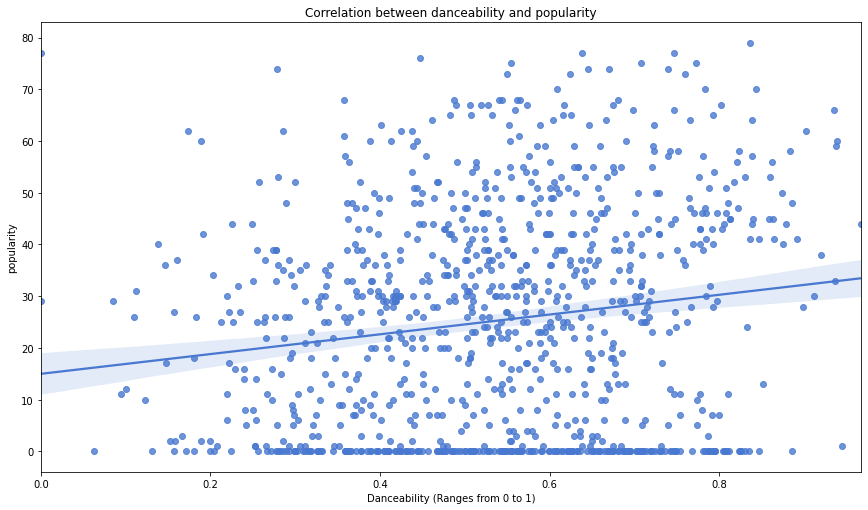

In [ ]:
plt.subplots(1,1,figsize=(14.70, 8.27))
ax1 = sns.regplot(data = df_sample, x = 'danceability', y = 'popularity')
ax1.set_title('Correlation between danceability and popularity')
ax1.set_xlabel('Danceability (Ranges from 0 to 1)')

### Key and other features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


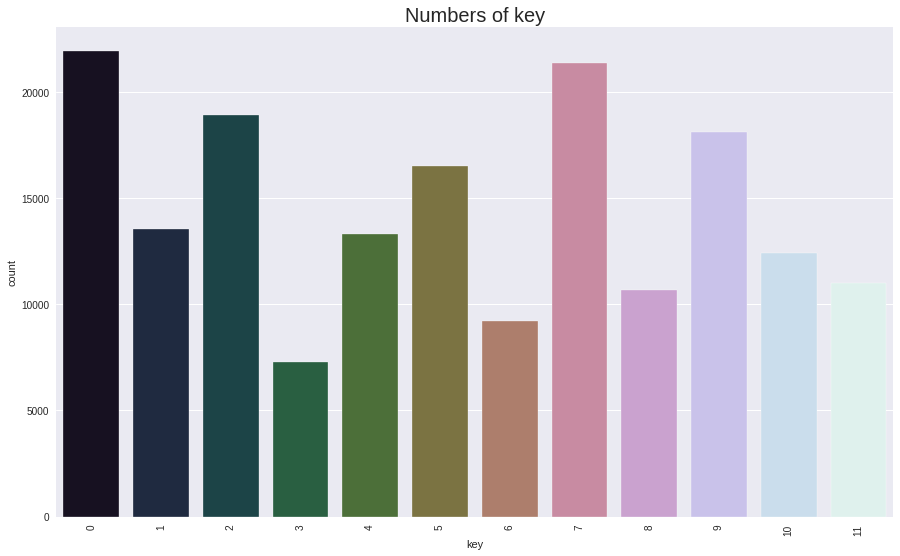

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(df['key'], palette = 'cubehelix')
plt.title('Numbers of key', fontweight = 30, fontsize = 20)
plt.xlabel('key')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

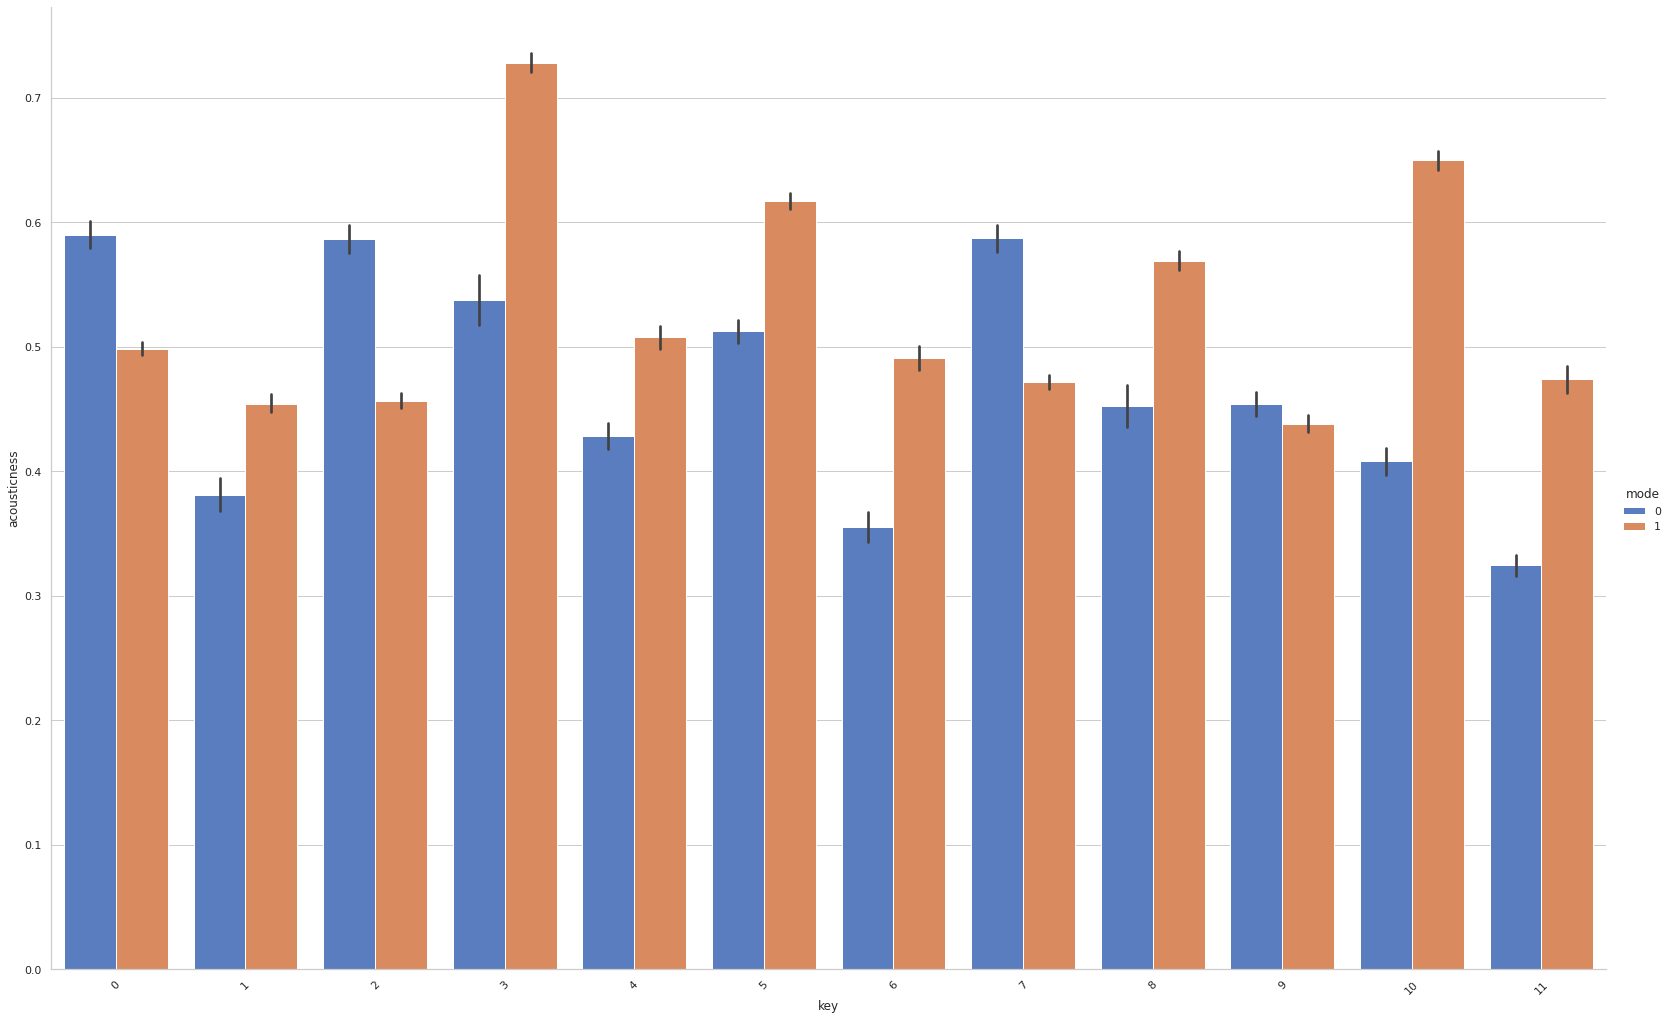

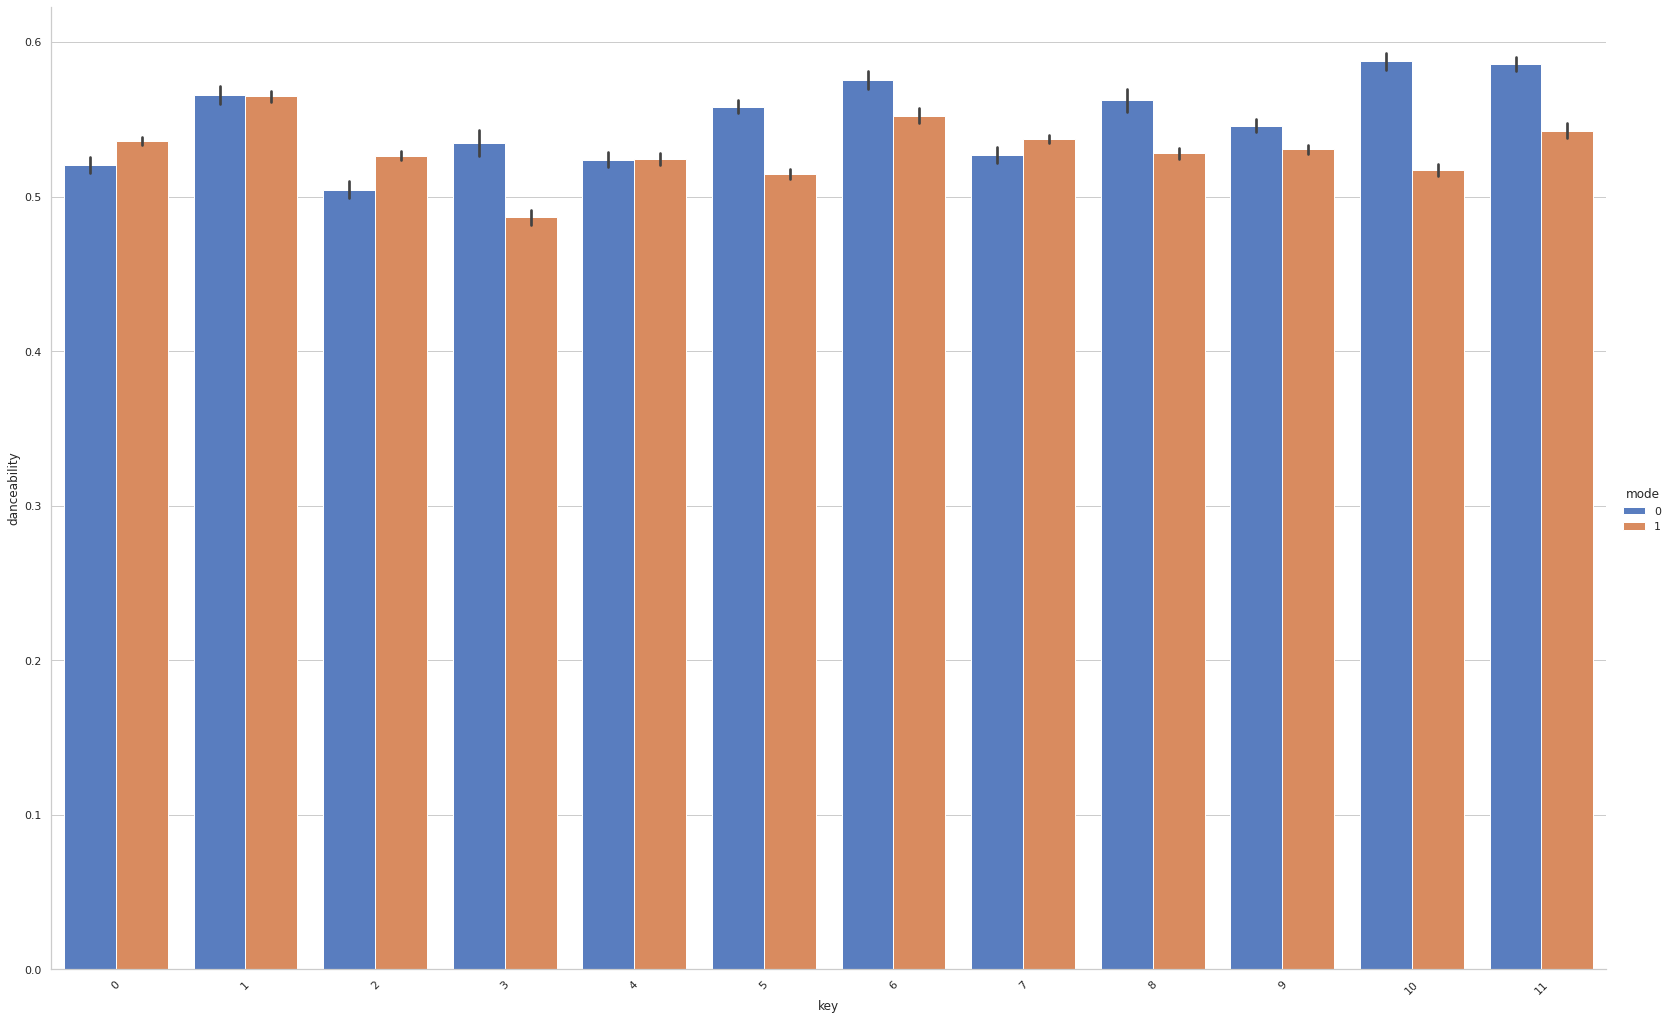

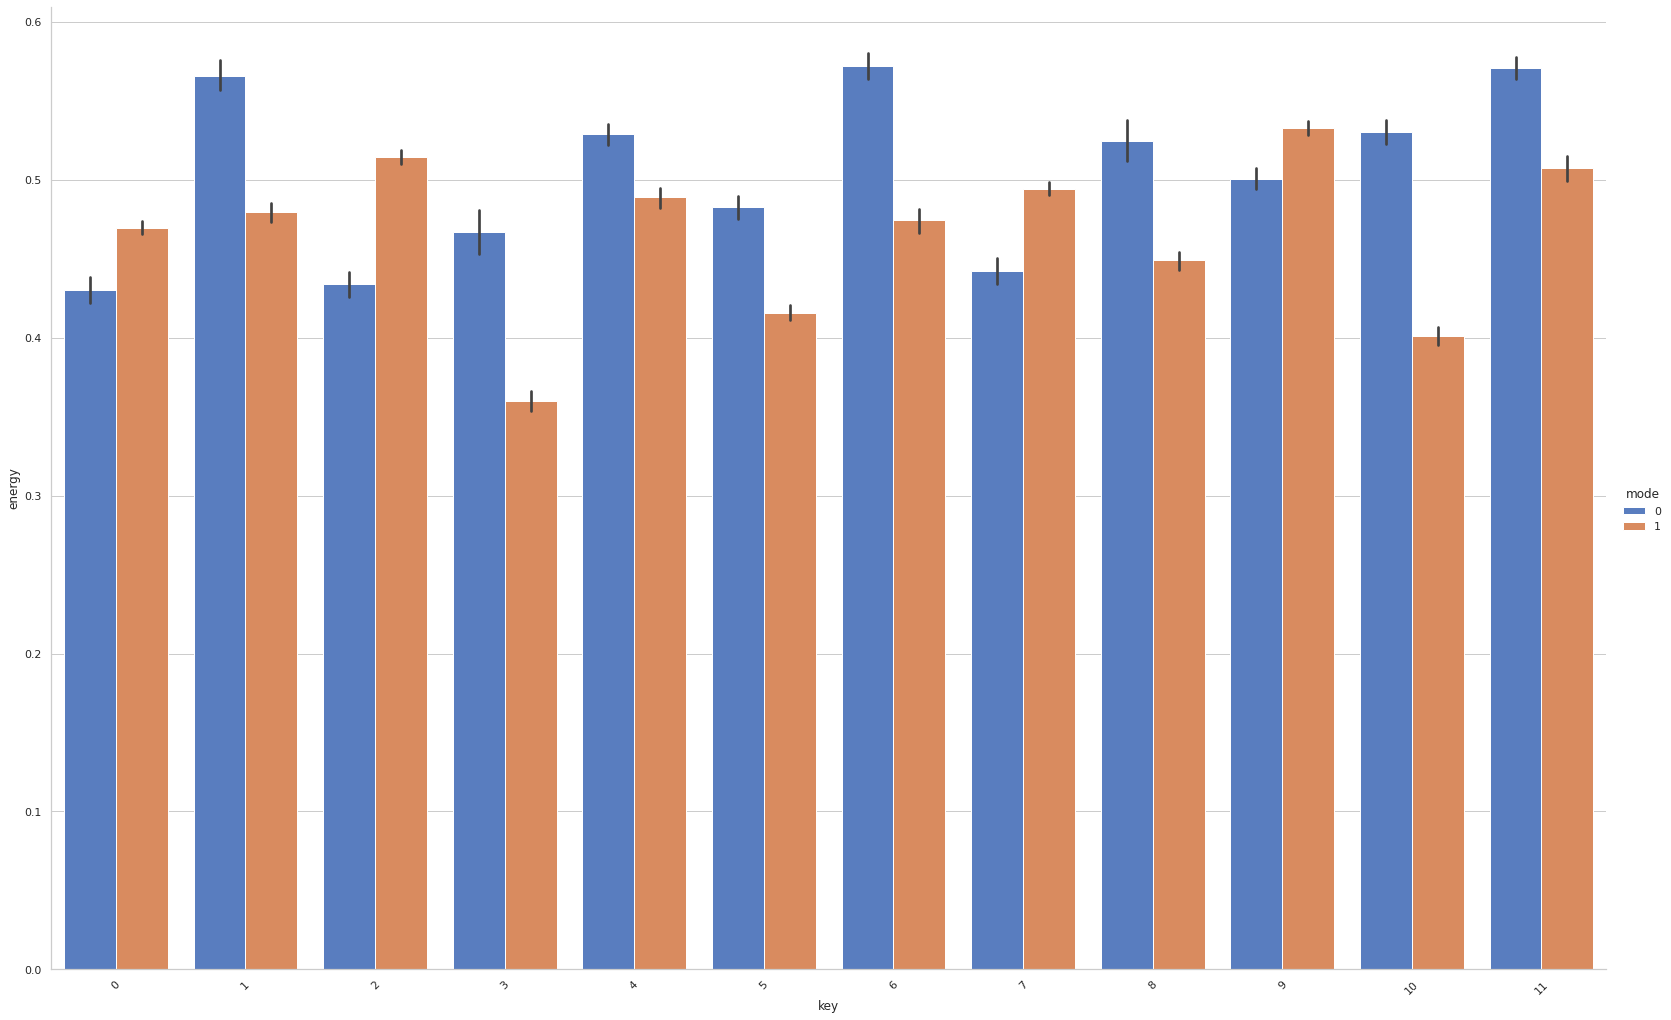

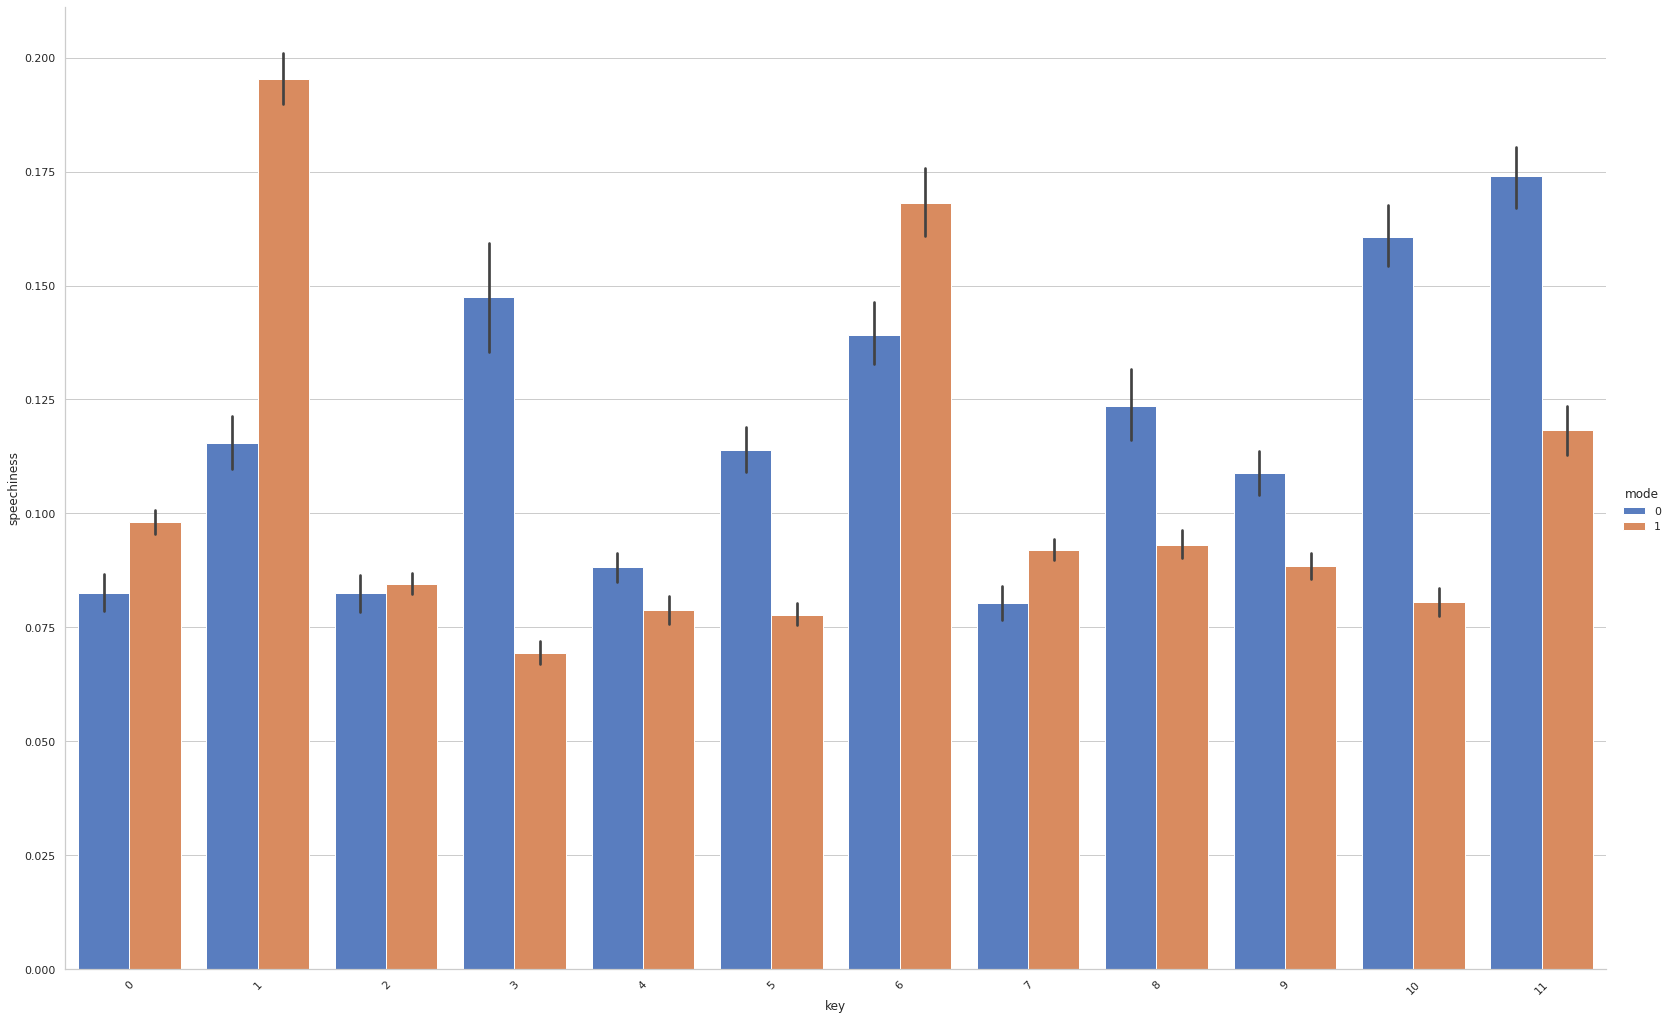

In [ ]:
chart = sns.catplot(x="key", y="acousticness", hue="mode", data=df, height=14, aspect=1.6, kind="bar", palette="muted");
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x="key", y="danceability", hue="mode", data=df, height=14, aspect=1.6, kind="bar", palette="muted");
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x="key", y="energy", hue="mode", data=df, height=14, aspect=1.6, kind="bar", palette="muted");
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x="key", y="speechiness", hue="mode", data=df, height=14, aspect=1.6, kind="bar", palette="muted");
chart.set_xticklabels(rotation=45);

### scatter plot

In [ ]:
def scatter_plot(df, col_x, col_y):
    plt.scatter(df[col_x], df[col_y], alpha=0.2)
    # create x and y axis labels
    plt.xlabel("x")
    plt.ylabel("Popularity")
    plt.show()

## Correlation

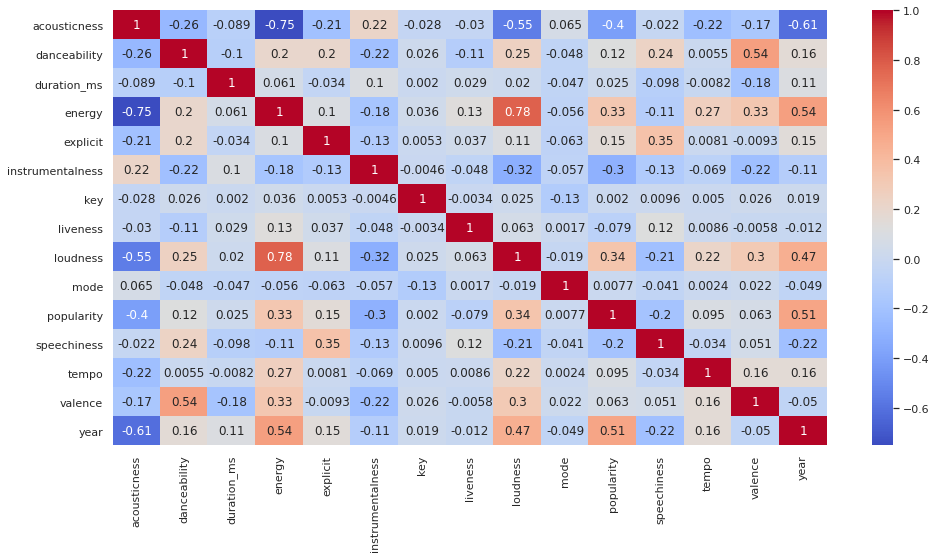

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True, cmap="coolwarm")

In [ ]:
series = np.abs(corr['popularity']).sort_values(ascending=False)
print('The most linear correlated features to POPULARITY are:')
for i, row in enumerate(series):
    if 0.1 <= row < 1:
      print(f'{series.index[i]:17} --> {row: .2f} (abs)')

The most linear correlated features to POPULARITY are:
year              -->  0.51 (abs)
acousticness      -->  0.40 (abs)
loudness          -->  0.34 (abs)
energy            -->  0.33 (abs)
instrumentalness  -->  0.30 (abs)
speechiness       -->  0.20 (abs)
explicit          -->  0.15 (abs)
danceability      -->  0.12 (abs)


popularity score와 상관관계 (절댓값)
* 0.3 이상: year, acousticness, loudness, energy, instrumentalness
* 0.1 이상: speechiness, explicit, danceability

## Popularity Analysis

In [ ]:
print('popularity 점수가 90점 이상인 노래는 총', len(df[df["popularity"] >= 90]), '곡 입니다.\n')
df[df["popularity"] > 90]["name"]

popularity 점수가 90점 이상인 노래는 총 44 곡 입니다.



19470                                    Snowman
19670                           Watermelon Sugar
19862                     Mood (feat. iann dior)
19864                                  Good Days
19866                                  positions
19868                                      34+35
19870                                    Whoopty
19872                                WITHOUT YOU
19874    For The Night (feat. Lil Baby & DaBaby)
19876                             Therefore I Am
19878                    What You Know Bout Love
19880            WAP (feat. Megan Thee Stallion)
19884                                    HOLIDAY
19886                                     DÁKITI
19892               ROCKSTAR (feat. Roddy Ricch)
19896                                    Heather
19900                         you broke me first
19908                 Lonely (with benny blanco)
19924     Monster (Shawn Mendes & Justin Bieber)
19928                         LA NOCHE DE ANOCHE
19974               

In [19]:
df[df["popularity"] > 65][["name", "artists"]]

,name,artists
4262,White Christmas,"['Bing Crosby', 'Ken Darby Singers', 'John Sco..."
4662,Have Yourself A Merry Little Christmas,['Judy Garland']
5262,Here Comes Santa Claus (Right Down Santa Claus...,['Gene Autry']
5662,Twelve Days Of Christmas,"['Bing Crosby', 'The Andrews Sisters']"
5663,Gymnopédie No. 1,"['Erik Satie', 'Philippe Entremont']"
...,...,...
174183,Regardless,"['RAYE', 'Rudimental']"
174185,Crisis,['Jasiah']
174187,@ MEH,['Playboi Carti']
174351,Waiting On A War,['Foo Fighters']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

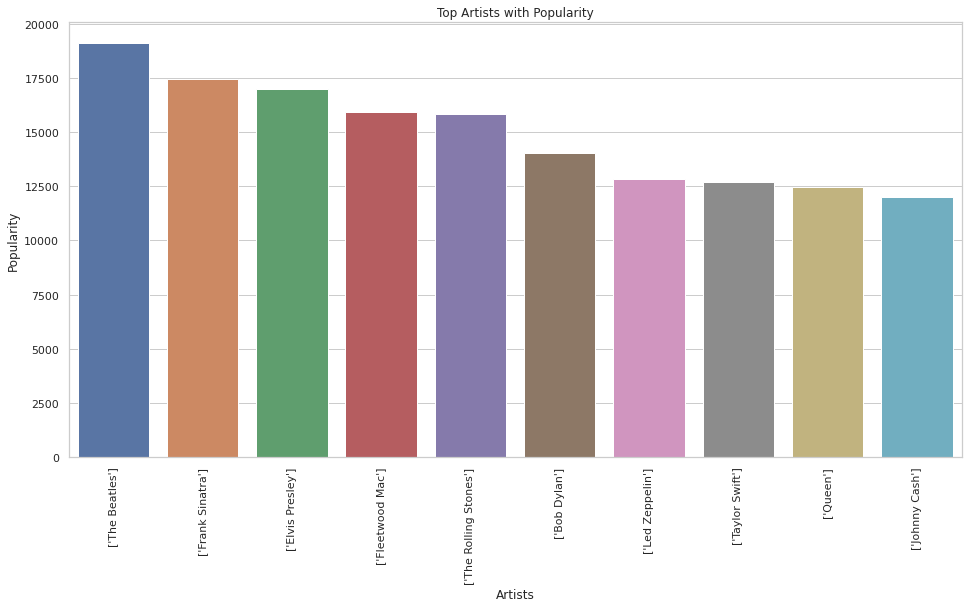

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

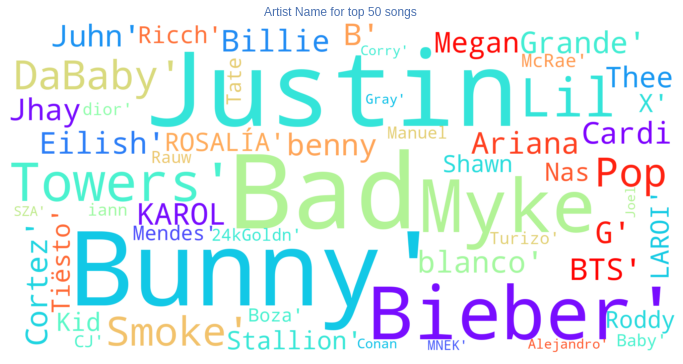

In [ ]:
from wordcloud import WordCloud

df_2020 = df[df['year']==2020]
df_top = df_2020[df_2020["popularity"] > 90]

plt.style.use('seaborn')
wrds1 = df_top["artists"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(12,18))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name for top 50 songs ",color='b')
plt.show()

# Split Dataset

popularity score와 상관관계 (절댓값)
* 0.3 이상: year, loudness, instrumentalness, energy, acousticness
* 0.1 이상: speechiness, explicit, danceability

In [9]:
from sklearn.model_selection import train_test_split

In [47]:
df_copy = df

In [81]:
# Read column names from file
path = '/content/drive/MyDrive/[2021-1]DM/Project/Spotify data/data.csv'
cols = list(pd.read_csv(path, nrows =1))
df = pd.read_csv(path)
df = df[df['year']<2019]
df = df[df['year']>=2010]
df = df.drop(['artists','id','name','release_date','year', 'duration_ms', 'explicit', 'speechiness'], axis=1)

# Remove duplicated
df = df[~df.duplicated()==1]
# df = df.sample(frac=0.3)

#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop('popularity', axis=1), df['popularity'], test_size = 0.2, random_state = 12345)

In [82]:
nl = '\n'
print(f'X_train shape is: {X_train.shape} {nl}y_train shape is: {y_train.shape} {nl}X_test shape is: {X_test.shape} {nl}y_test shape is: {y_test.shape}')

X_train shape is: (15128, 10) 
y_train shape is: (15128,) 
X_test shape is: (3783, 10) 
y_test shape is: (3783,)


In [83]:
X_train.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,tempo,valence
157143,0.2290,0.894,0.466,0.000000,9,0.9300,-7.794,1,135.254,0.798
18016,0.4200,0.677,0.776,0.000689,5,0.0954,-5.933,1,121.834,0.642
171209,0.3520,0.629,0.233,0.812000,5,0.0917,-13.703,1,140.013,0.200
38544,0.0026,0.617,0.759,0.000000,0,0.4190,-6.785,0,122.924,0.324
142353,0.0433,0.812,0.522,0.000000,2,0.1540,-5.287,1,75.524,0.380


# Data Preprocessing

In [84]:
# duration ms->분으로 단위 변경
df_copy["duration_minutes"] = df_copy["duration_ms"] / 60000
df_copy["duration_minutes"] = df_copy["duration_minutes"].round(3)
df_copy["duration_minutes"].head()

NameError: ignored

In [44]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [85]:
# Instrumentalness Transformer

def instrumentalness_criteria(X):
    X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))

instrumentalness_tranformer = FunctionTransformer(instrumentalness_criteria)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)

In [86]:
X_train

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,tempo,valence
157143,0.2290,0.894,0.466,1,9,0.9300,-7.794,1,135.254,0.798
18016,0.4200,0.677,0.776,1,5,0.0954,-5.933,1,121.834,0.642
171209,0.3520,0.629,0.233,2,5,0.0917,-13.703,1,140.013,0.200
38544,0.0026,0.617,0.759,1,0,0.4190,-6.785,0,122.924,0.324
142353,0.0433,0.812,0.522,1,2,0.1540,-5.287,1,75.524,0.380
...,...,...,...,...,...,...,...,...,...,...
158245,0.0621,0.567,0.680,1,3,0.5190,-6.254,0,89.987,0.429
56366,0.3270,0.486,0.839,1,10,0.0480,-4.500,1,165.948,0.398
124540,0.2050,0.557,0.998,2,1,0.1360,-7.155,1,160.001,0.347
37522,0.0297,0.771,0.621,1,1,0.1240,-7.453,1,101.007,0.154


In [87]:
class ReplaceZeroTransformer():
    """Eliminates Zero values from tempo columns and replace it 
       with the median or mean of non-zero values as specified.
       defaut is set to 'median'.
    """

    def __init__(self, method='median'):
        self.method = method

    def transform(self, X):
        if self.method == 'median':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].median()
        elif self.method == 'mean':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].mean()
        else:
            raise Exception("Method can be 'median' or 'mean' only!")
        return X

In [88]:
tempo_transformer = ReplaceZeroTransformer()
X_train = tempo_transformer.transform(X_train)
X_test = tempo_transformer.transform(X_test)

In [89]:
ohe = OneHotEncoder(categories='auto', drop='first')

# Train
feature_arr = ohe.fit_transform(X_train[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_train['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_train['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_train.index)
X_train = pd.concat([X_train, features], axis=1).drop(['key','instrumentalness'], axis=1)

# Test
feature_arr = ohe.fit_transform(X_test[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_test['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_test['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_test.index)
X_test = pd.concat([X_test, features], axis=1).drop(['key','instrumentalness'], axis=1)

In [90]:
scaler = MinMaxScaler()
cols = ['loudness','tempo']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [91]:
X_train.head()

,acousticness,danceability,energy,liveness,loudness,mode,tempo,valence,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,ins_2,ins_3
157143,0.2290,0.894,0.466,0.9300,0.806713,1,0.539879,0.798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18016,0.4200,0.677,0.776,0.0954,0.838942,1,0.467101,0.642,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
171209,0.3520,0.629,0.233,0.0917,0.704380,1,0.565687,0.200,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38544,0.0026,0.617,0.759,0.4190,0.824186,0,0.473012,0.324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142353,0.0433,0.812,0.522,0.1540,0.850129,1,0.215958,0.380,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
X_train.shape

(15128, 21)

In [93]:
X_train = X_train.drop(['ins_2', 'ins_3'], axis=1)
X_test = X_test.drop(['ins_2', 'ins_3'], axis=1)

In [94]:
# Divide the popularity by 100
y_train = y_train / 100
y_test = y_test / 100

# Model Selection

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn.tree import DecisionTreeRegressor, export_graphviz

## Random Forest

In [96]:
random_forest = RandomForestRegressor()

random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Important features
____________________________________________________________
91.95


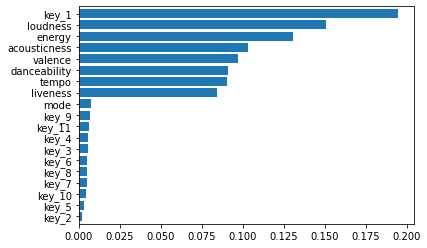

In [97]:
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_, X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

## Linear Regression

상관계수가 0.2보다 큰 피처들만 선택한 경우

In [98]:
LR = LinearRegression()
cols = [col for col in X_train.columns if abs(X_train[col].corr(y_train))>0.2]

# Fit the model and
LR.fit(X_train.drop(columns=cols), y_train)

# Train Predicting with the model
y_train_pred = LR.predict(X_train.drop(columns=cols)).clip(0, 1)

# RMSE Train
LR_rmse = np.sqrt(mse(y_train, y_train_pred))
print(f"RMSE Train = {LR_rmse:.5f}")

#Predicting with the model
y_test_pred = LR.predict(X_test.drop(columns=cols)).clip(0, 1)

# RMSE Test
LR_rmse = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE Test = {LR_rmse:.5f}")

RMSE Train = 0.27044
RMSE Test = 0.27005


모든 피처를 사용한 경우

In [99]:
LR = LinearRegression()

# Fit the model and
LR.fit(X_train, y_train)

# Train Predicting with the model
y_train_pred = LR.predict(X_train).clip(0, 1)

# RMSE Train
LR_rmse = np.sqrt(mse(y_train, y_train_pred))
print(f"RMSE Train = {LR_rmse:.6f}")

#Predicting with the model
y_test_pred = LR.predict(X_test).clip(0, 1)

# RMSE Test
LR_rmse = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE Test = {LR_rmse:.6f}")

RMSE Train = 0.255067
RMSE Test = 0.253769


In [100]:
def model_selection(X_train, y_train, kfold=3):
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import cross_val_score
    from tqdm.notebook import tqdm

    models = [
        LinearRegression(),
        RandomForestRegressor(),
    ]
    
    progress_bar = tqdm(total = len(models) * kfold)
    
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, X_train, y_train, cv=kfold, n_jobs=-1)
    
        for fold_idx, accuracy in enumerate(accuracies):
            progress_bar.update()
            entries.append((model_name, fold_idx, accuracy))
    
    progress_bar.close()
    
    cv_result = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'], index=range(kfold * len(models)))
    return cv_result

In [101]:
model_selection_result = model_selection(X_train, y_train)

In [102]:
model_selection_result

,model_name,fold_idx,accuracy
0,LinearRegression,0,0.273612
1,LinearRegression,1,0.278605
2,LinearRegression,2,0.269841
3,RandomForestRegressor,0,0.431063
4,RandomForestRegressor,1,0.425978
5,RandomForestRegressor,2,0.422484


In [103]:
# 선택한 피처로만 모델 훈련 및 평가
cols = [col for col in X_train.columns if abs(X_train[col].corr(y_train))>0.2]

model_selection_result = model_selection(X_train.drop(columns=cols), y_train)

In [104]:
model_selection_result

,model_name,fold_idx,accuracy
0,LinearRegression,0,0.167597
1,LinearRegression,1,0.176600
2,LinearRegression,2,0.171756
3,RandomForestRegressor,0,0.398879
4,RandomForestRegressor,1,0.388716
5,RandomForestRegressor,2,0.379275


# Popularity Prediction

## Prepare Data

In [105]:
# melon 2019 top100 데이터 로드 
korean = pd.read_csv('/content/drive/MyDrive/[2021-1]DM/Project/chart_data/Korean2019.csv')
korean.head()

,Unnamed: 0,Title,Artists,Popularity,Acousticness,Danceability,Energy,Liveness,Loudness,Valence,Mode,Key,Instrumentalness,Tempo,Track id
0,0,If there was practice in love (Prod. 2soo),Lim Jae Hyun,36,0.5840,0.543,0.431,0.108,-6.784,0.173,0,4,0.000019,135.813,3qCL1z9ex9cM26sAYfAHxU
1,1,The day was beautiful,Kassy,39,0.6950,0.615,0.447,0.122,-5.522,0.316,1,7,0.000000,133.742,3LpAsXjqTQ5FUyptb2lujH
2,2,Boy With Luv (feat. Halsey),BTS,82,0.0923,0.645,0.862,0.192,-4.757,0.798,0,11,0.000000,119.991,5KawlOMHjWeUjQtnuRs22c
3,3,After You’ve Gone,M.C the Max,34,0.6560,0.432,0.526,0.120,-5.371,0.212,1,9,0.000000,132.106,6MbO4CpHNgsdV4dn2cGKWp
4,4,"Every day, Every Moment",Paul Kim,56,0.8590,0.470,0.288,0.103,-9.434,0.153,1,8,0.000018,133.250,3Ml2s37uS9jqRM2R3bfDiB


In [106]:
korean = korean.drop(['Unnamed: 0'], axis=1)

In [107]:
# spotify api로 오디오피처가 검색되지 않는 노래는 제외

korean = korean.drop(index=[27, 40, 44, 45, 46, 49, 59, 60, 64, 77, 84, 85, 94, 96, 97], axis=0)

In [108]:
korean.shape

(85, 14)

## Split Data

In [109]:
# Read column names from file
korean = korean.drop(['Artists','Track id','Title'], axis=1)

# Remove duplicated
korean = korean[~korean.duplicated()==1]

#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(korean.drop('Popularity', axis=1), 
                                                    korean['Popularity'], 
                                                    test_size = 0.2, 
                                                    random_state = 12345)

In [110]:
nl = '\n'
print(f'X_train shape is: {X_train.shape} {nl}y_train shape is: {y_train.shape} {nl}X_test shape is: {X_test.shape} {nl}y_test shape is: {y_test.shape}')

X_train shape is: (66, 10) 
y_train shape is: (66,) 
X_test shape is: (17, 10) 
y_test shape is: (17,)


In [111]:
X_train.head()

,Acousticness,Danceability,Energy,Liveness,Loudness,Valence,Mode,Key,Instrumentalness,Tempo
32,0.801,0.438,0.525,0.183,-4.957,0.245,1,4,0.0,136.952
74,0.651,0.382,0.372,0.107,-6.738,0.166,1,6,0.0,124.046
67,0.626,0.451,0.526,0.403,-4.248,0.275,0,4,0.0,129.837
57,0.241,0.839,0.617,0.300,-4.692,0.821,1,7,0.0,143.894
81,0.484,0.548,0.678,0.368,-3.371,0.291,1,5,0.0,143.841


## Data Preprocessing

In [112]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [113]:
# Instrumentalness Transformer

def instrumentalness_criteria(X):
    X['Instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.Instrumentalness))

instrumentalness_tranformer = FunctionTransformer(instrumentalness_criteria)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)

In [114]:
class ReplaceZeroTransformer():
    """Eliminates Zero values from tempo columns and replace it 
       with the median or mean of non-zero values as specified.
       defaut is set to 'median'.
    """

    def __init__(self, method='median'):
        self.method = method

    def transform(self, X):
        if self.method == 'median':
            X.loc[X['Tempo']==0, 'Tempo'] = X.loc[X['Tempo']>0, 'Tempo'].median()
        elif self.method == 'mean':
            X.loc[X['Tempo']==0, 'Tempo'] = X.loc[X['Tempo']>0, 'Tempo'].mean()
        else:
            raise Exception("Method can be 'median' or 'mean' only!")
        return X

In [115]:
tempo_transformer = ReplaceZeroTransformer()
X_train = tempo_transformer.transform(X_train)
X_test = tempo_transformer.transform(X_test)

In [116]:
ohe = OneHotEncoder(categories='auto', drop='first')

# Train
feature_arr = ohe.fit_transform(X_train[['Instrumentalness','Key']]).toarray()
columns_key = ['Key_'+str(i) for i in list(set(X_train['Key'].values))[1:]]
instrumentalness_key = ['Ins_'+str(i) for i in list(set(X_train['Instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_train.index)
X_train = pd.concat([X_train, features], axis=1).drop(['Key','Instrumentalness'], axis=1)

# Test
feature_arr = ohe.fit_transform(X_test[['Instrumentalness','Key']]).toarray()
columns_key = ['Key_'+str(i) for i in list(set(X_test['Key'].values))[1:]]
instrumentalness_key = ['Ins_'+str(i) for i in list(set(X_test['Instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_test.index)
X_test = pd.concat([X_test, features], axis=1).drop(['Key','Instrumentalness'], axis=1)

In [117]:
scaler = MinMaxScaler()
cols = ['Loudness','Tempo']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [118]:
X_train.head()

,Acousticness,Danceability,Energy,Liveness,Loudness,Valence,Mode,Tempo,Key_1,Key_2,Key_3,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11
32,0.801,0.438,0.525,0.183,0.599168,0.245,1,0.541281,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.651,0.382,0.372,0.107,0.393439,0.166,1,0.440918,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
67,0.626,0.451,0.526,0.403,0.681067,0.275,0,0.485952,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.241,0.839,0.617,0.300,0.629779,0.821,1,0.595266,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
81,0.484,0.548,0.678,0.368,0.782373,0.291,1,0.594854,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# Divide the popularity by 100
y_train = y_train / 100
y_test = y_test / 100

## Prediction

In [121]:
print(random_forest.predict(X_train) * 100)

[18.73       28.22       19.09       20.09       41.41       27.16
 26.95       26.64       22.45       22.06       16.95       57.845
 23.87       56.13333333 24.72       30.44       18.49083333 16.67
 29.79666667 26.22       25.65       18.29       24.93       21.14666667
 36.35666667 25.7        30.04       29.52       38.13666667 38.96
 20.81666667 25.54       43.68       37.66       21.45       29.93
 24.41       14.51       26.07       17.26       29.24       53.47
 39.98       20.7        26.38       21.99       26.38       52.0075
 23.32       14.14       34.27       26.38       15.05       27.12
 48.47333333 28.58       24.46       18.49       28.11       11.76
 44.63       29.56       30.18       24.27       24.43       29.05      ]


# Popularity Prediction2

In [20]:
####################### Import Modules ############
# General tools
import os
import datetime

#For data Handling
import pandas as pd
import numpy as np

#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Progreebar
from tqdm import tqdm

# For transformations and predictions
from scipy.optimize import curve_fit
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error

# For validation
from sklearn.model_selection import train_test_split

## Load  Data

In [11]:
#Load all 5 Datasets

df = pd.read_csv('/content/drive/MyDrive/[2021-1]DM/Project/Spotify data/data.csv')

df_artist = pd.read_csv('/content/drive/MyDrive/[2021-1]DM/Project/Spotify data/data_by_artist.csv')

df_by_genres = pd.read_csv('/content/drive/MyDrive/[2021-1]DM/Project/Spotify data/data_by_genres.csv')

df_year = pd.read_csv('/content/drive/MyDrive/[2021-1]DM/Project/Spotify data/data_by_year.csv')

df_w_genres = pd.read_csv('/content/drive/MyDrive/[2021-1]DM/Project/Spotify data/data_w_genres.csv')

## Data Pre-processing

In [12]:
#Convert Milli secs duration into minutes
df['duration_min'] = df['duration_ms']/60000
df['duration_min'] = df['duration_min'].round(2)
df_by_genres['duration_min'] = df_by_genres['duration_ms']/60000
df_by_genres['duration_min'] = df_by_genres['duration_min'].round(2)

df['duration_min'].head()

0    2.81
1    2.50
2    2.73
3    7.03
4    2.75
Name: duration_min, dtype: float64

In [13]:
#Remove the Square Brackets from the artists

df["artists"]=df["artists"].str.replace("[", "")
df["artists"]=df["artists"].str.replace("]", "")
df["artists"]=df["artists"].str.replace("'", "")

df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_min
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,2.81
1,0.643000,"""Screamin Jay Hawkins""",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,2.50
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,2.73
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,7.03
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,2.75


In [14]:
#Remove unnecessary Braces from the genres column

df_w_genres['genres'] = df_w_genres['genres'].str.replace("'","")
df_w_genres['genres'] = df_w_genres['genres'].str.replace("[","")
df_w_genres['genres'] = df_w_genres['genres'].str.replace("]","")

df_w_genres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,show tunes
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,


In [15]:
df.duplicated().any().sum()

1

In [16]:
df.shape

(174389, 20)

In [17]:
df = df[~df.duplicated()==1]
df.shape

(172230, 20)

In [18]:
#Drop the columns
df.drop(['duration_ms'],inplace=True,axis=1)

## Feature Selection

AttributeError: ignored

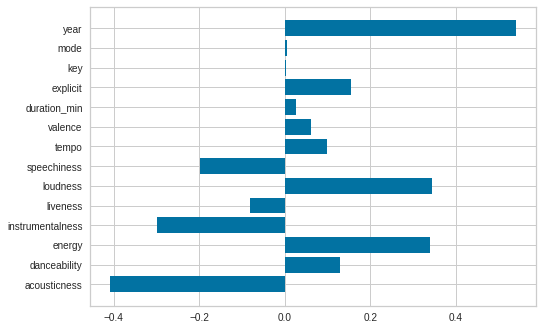

In [21]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_min','explicit','key','mode','year']

X, y = df[feature_names], df['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()  

In [22]:
cols = list(pd.read_csv('/content/drive/MyDrive/[2021-1]DM/Project/Spotify data/data.csv'))
df1 = pd.read_csv('/content/drive/MyDrive/[2021-1]DM/Project/Spotify data/data.csv', usecols=[i for i in cols if i not in ['id','name','release_date']])

# Remove duplicated
df1 = df1[~df1.duplicated()==1]

#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(df1.drop('popularity', axis=1), df1['popularity'], test_size = 0.2, random_state = 42)

In [23]:
X_train.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
140722,0.00091,['Estiva'],0.484,284919,0.8950,0,0.797000,8,0.311,-10.060,0,0.0492,132.058,0.186,2018
83785,0.38700,['Joe Cocker'],0.274,317800,0.3170,0,0.000005,5,0.103,-13.103,1,0.0286,64.160,0.192,1969
32075,0.95900,"['Johann Sebastian Bach', 'Yo-Yo Ma']",0.231,290800,0.0698,0,0.896000,3,0.157,-25.044,1,0.0436,95.700,0.442,1983
101208,0.14000,['Donnie Fritts'],0.856,174107,0.4420,0,0.002250,11,0.119,-14.479,0,0.0538,98.158,0.968,1974
59270,0.98600,['Dimitris Arapakis'],0.358,182973,0.2310,0,0.024900,5,0.260,-12.350,0,0.0450,74.459,0.400,1930


In [24]:
n_features = df.shape[1]
n_samples = df.shape[0]
 
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), cv=3, n_jobs=-1, verbose=5,
                    param_grid ={
                    'max_depth': [None,5,6,7,8,9,10,11],
                    'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7, n_features//2, n_features//3, ],
                    'min_samples_split': [2,0.3,0.5, n_samples//2, n_samples//3, n_samples//5],
                    'min_samples_leaf':[1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//5]},
                    )
 
grid.fit(X_train, y_train)
print('Train R^2 Score : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%grid.best_estimator_.score(X_test,y_test))
print('Best R^2 Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2174 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3038 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3524 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | ela

PicklingError: ignored

In [ ]:
class Artists:
    """
     This transformer recives a DF with a feature 'artists' of dtype object
      and convert the feature to a float value as follows:
      1. Replace the data with the artists mean popularity
      2. Replace values where artists appear less than MinCnt with y.mean()
      3. Replace values where artists appear more than MaxCnt with 0
      
      PARAMETERS:
      ----------
      MinCnt (int): Minimal treshold of artisits apear in dataset, default = 3
      MaxCnt (int): Maximal treshold of artisits apear in dataset, default = 600

      RERTURN:
      ----------
      A DataFrame with converted artists str feature to ordinal floats
    
    """
    def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
        self.MinCnt = MinCnt
        self.MaxCnt = MaxCnt
        self.artists_df = None

    def fit (self, X, y):
        self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
        self.artists_df.loc['unknown'] = [y.mean(), 1]
        self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
        self.artists_df.loc[self.artists_df['count'] >= self.MaxCnt, 'mean'] = 0
        return self

    def transform(self, X, y=None):
        X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
        X['artists'] = X['artists'].map(self.artists_df['mean'])
        return X
  
    
#Instrumental Transformer Criteria

def instrumental(X):
    X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))
    
    
class Tempo():
    """Eliminates Zero values from tempo columns and replace it 
       with the median or mean of non-zero values as specified.
       defaut is set to 'median'.
    """

    def __init__(self, method='median'):
        self.method = method

    def transform(self, X):
        if self.method == 'median':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].median()
        elif self.method == 'mean':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].mean()
        else:
            raise Exception("Method can be 'median' or 'mean' only!")
        return X

In [ ]:
# Apply Aritists class on train and test seperatly
artists_transformer = Artists(MinCnt=2)
X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
X_test = artists_transformer.transform(X_test, y_test)

#Apply Instrumental Criteria on train & test seperately
instrumentalness_tranformer = FunctionTransformer(instrumental)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)

#Apply Tempo Transformer class on Train & Test seperately
tempo_transformer = Tempo()
X_train = tempo_transformer.transform(X_train)
X_test = tempo_transformer.transform(X_test)

In [ ]:
ohe = OneHotEncoder(categories='auto', drop='first')

# Train
feature_arr = ohe.fit_transform(X_train[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_train['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_train['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_train.index)
X_train = pd.concat([X_train, features], axis=1).drop(['key','instrumentalness'], axis=1)

# Test
feature_arr = ohe.fit_transform(X_test[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_test['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_test['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_test.index)
X_test = pd.concat([X_test, features], axis=1).drop(['key','instrumentalness'], axis=1)

In [ ]:
scaler = MinMaxScaler()
cols = ['artists','duration_ms','loudness','tempo']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [ ]:
# Divide the popularity by 100
y_train = y_train / 100
y_test = y_test / 100

In [ ]:
# Decision tree with tuned hyperparameters using GridSearchCV
dec_tree2 = DecisionTreeRegressor(max_depth=9, max_features=None, 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0)
dec_tree2.fit(X_train,y_train)
y_test_pred2 = dec_tree2.predict(X_test)
mae2 = mean_absolute_error(y_test, y_test_pred2)
print(f'Mean absolute error of this model: {mae2:.3f}')

# Song Recommendation

In [ ]:
def normalize_column(col):
    """
    col - column in the dataframe which needs to be normalized
    """
    max_d = df[col].max()
    min_d = df[col].min()
    df[col] = (df[col] - min_d)/(max_d - min_d)

In [ ]:
#Normalize allnumerical columns so that min value is 0 and max value is 1
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

In [ ]:
km = KMeans(n_clusters=25)
pred = km.fit_predict(num)
df['pred'] = pred
normalize_column('pred')

In [ ]:
class Song_Recommender():

    def __init__(self, data):
        self.data_ = data
    
    def get_recommendations(self, song_name, n_top):
        distances = []
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                if not col in [1,10]:
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name']
        return rem_data[columns][:n_top]

In [ ]:
recommender = Song_Recommender(df)
recommender.get_recommendations('canon in d', 10)